# Titanic: Machine Learning from Disaster 泰坦尼克号生存率预测

<img src="Image/website.png" width="100%">

### 主页 

https://www.kaggle.com/c/titanic

### 项目背景

泰坦尼克号于1909年3月31日在爱尔兰动工建造，1911年5月31日下水，次年4月2日完工试航。她是当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”的美誉。然而讽刺的是，泰坦尼克号首航便遭遇厄运：1912年4月10日她从英国南安普顿出发，途径法国瑟堡和爱尔兰昆士敦，驶向美国纽约。在14日晚23时40分左右，泰坦尼克号与一座冰山相撞，导致船体裂缝进水。次日凌晨2时20分左右，泰坦尼克号断为两截后沉入大西洋，其搭载的2224名船员及乘客，在本次海难中逾1500人丧生。

虽然在生存中有一些运气因素，但由于船长的一声“让女人和孩子先走！”，似乎有些人比其他人更有可能生存。

<img src="Image/titanic.jpg" width="100%">


Kaggle平台为我们提供了一个竞赛案例“Titanic: Machine Learning from Disaster”，在该案例中，我们将探究**什么样的人在此次海难中幸存的几率更高，并使用乘客数据（即姓名、年龄、性别、社会经济阶层等）通过构建预测模型来预测乘客生存率。**


## Kaggle实战解题的基本步骤
1. 总览问题和目标，是什么数学问题，希望得到什么结果
2. 获取数据
3. 探索数据：进一步获取更深层次的信息（可以使用可视化）
4. 数据预处理、特征工程等
6. 构建不同的模型加以训练
7. 进行模型验证并微调模型(超参数)
8. 产生结果提交

> 注：Kaggle python 环境镜像：https://github.com/kaggle/docker-python

### 1. 总览问题和目标，是什么数学问题，希望得到什么结果

- 用机器学习的术语定义目标
- 判断是什么类型的问题，监督非监督，在线离线等等
- 怎么进行性能评估
- 有类似的问题吗？是否可以重用解决方案和工具


#### 定义目标

> 训练一个模型 $f(X)$，输入乘客特征$X$，预测该乘客是否能生存$y_{pred}$，将预测结果$y_{pred}$与真实值$y_{true}$进行比较，尽可能使其误差变小。

#### 问题类型
> 有监督问题，二分类问题

#### 性能评估
> 准确率
**accuracy** = (TP+TN)/(TP+TN+FP+FN)

<img src="Image/accuracy.png" width="60%">

#### 有类似的问题吗？
> 第一个项目，暂未遇到过类似问题


### 2. 获取数据
- 列出所需要的数据
- 检查需要占用的空间
- 获取数据
- 检查数据的大小和类型，比如时间序列，样本，和地理位置


#### 列出所需要的数据
> 数据集： https://www.kaggle.com/c/titanic/data

#### 检查需要占用的空间
> 90.9 KB

#### 获取数据
> 注册项目后可点击download直接下载

#### 检查数据的大小和类型
数据已分为两组：
- 训练集（train.csv）
- 测试集（test.csv）

训练集应用于构建您的机器学习模型。训练集提供了每位乘客最终生存与否的结果。

测试集用来查看模型在未知数据上的表现如何。测试集不提供每位乘客的最终生存与否的情况。请使用训练后的模型对测试集中的每个乘客预测，预测他们是否在泰坦尼克号沉没中幸存下来。

数据集中还包括*gender_submission.csv*，这是一组假设所有女性乘客都可以幸存的预测结果，作为*提交文件的示例*。

数据字段如下：

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>中文</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>是否幸存</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>乘客等级</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td>性别</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td>年龄</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td>同行旁系亲属个数</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td>同行直系亲属个数</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td>船票编号</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td>船票价格</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td>客舱编号</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>登船港口</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

- pclass：乘客等级，社会经济地位的缩影
    - 1st =一等舱位
    - 2nd =二等舱位
    - 3rd =三等舱位
- Age	：如果年龄小于1，则年龄是小数。如果估计年龄，则以xx.5的形式出现
- sibsp：旁系亲属家庭关系
    - 兄弟姐妹=兄弟，姐妹，同父异母的弟弟，义妹
    - 配偶=丈夫，妻子（包二奶和未婚夫被忽略）
- parch：直系亲属家庭关系
    - 父=母亲，父亲
    - 儿童=女儿，儿子，继女，继子
    - 有些孩子只带一个保姆旅行，因此他们的这个特征等于0。

In [1]:
import pandas as pd

# 训练集
train_df = pd.read_csv("dataset/titanic/train.csv")
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 测试集
test_df = pd.read_csv("dataset/titanic/test.csv")
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# 提交文件的示例
submit_example = pd.read_csv("dataset/titanic/gender_submission.csv")
print(submit_example.shape)
submit_example.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 3. 探索数据：进一步获取更深层次的信息
- 创建数据集的一个副本。如有必要，取样到适合大小。
- 创建jupyter文件，保存数据探索的过程。
- 研究每个属性及其特征
    - 名称
    - 类型(数值型，类别型，文本等)
    - 缺失值的百分比
    - 噪声和噪声类型(随机、异常值、舍弃误差等)
    - 分布类型，高斯？正态？均匀？对数？
- 如果是监督问题，确定标记出目标值。
- 可视化数据
- 研究不同属性间的相关性(corr)
- 研究通常怎么解决该问题
- 确定您可能想要应用的有希望的转换。
- 记录所得到的结果

In [4]:
import numpy as np # 线性代数包
import pandas as pd # 数据处理包
import matplotlib.pyplot as plt # 数据可视化包
import seaborn as sns # 数据可视化包
import sklearn
print(sklearn.__version__)

0.23.2


### 3.1 数据探查
研究每个属性及其特征，统计性的特征

分布情况：高斯？正态？均匀？对数？

异常值：随机、异常值、舍弃误差等

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
def outer(df, column):
    df_ = df.copy()
    # 这里将大于上四分位数(Q3)的设定为异常值
    df_['isOutlier'] = df_[column] > df_[column].quantile(0.75)
    df_rst = df_[df_['isOutlier'] == True]
    print(df_rst)

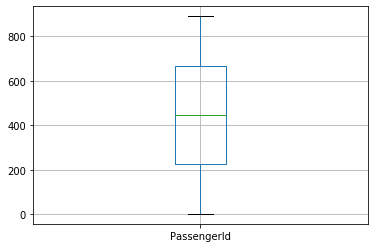

In [7]:
train_df.boxplot(column="PassengerId")

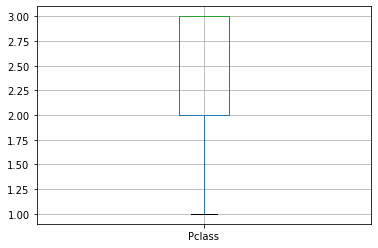

In [8]:
train_df.boxplot(column="Pclass")

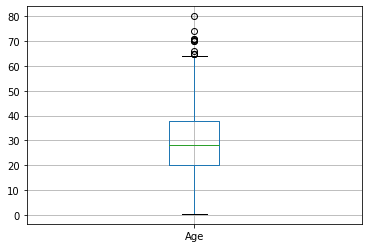

In [9]:
train_df.boxplot(column="Age")

In [10]:
outer(train_df,"Age")

     PassengerId  Survived  Pclass  \
6              7         0       1   
11            12         1       1   
13            14         0       3   
15            16         1       2   
30            31         0       1   
..           ...       ...     ...   
865          866         1       2   
871          872         1       1   
873          874         0       3   
879          880         1       1   
885          886         0       3   

                                                 Name     Sex   Age  SibSp  \
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
30                           Uruchurtu, Don. Manuel E    male  40.0      0   
..                                                ...     ...   ...    ... 

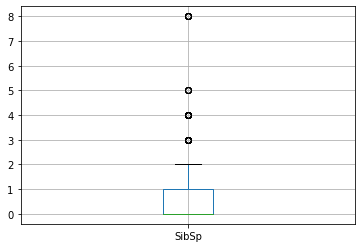

In [11]:
train_df.boxplot(column="SibSp")

In [12]:
outer(train_df,"SibSp")

     PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
16            17         0       3                     Rice, Master. Eugene   
24            25         0       3            Palsson, Miss. Torborg Danira   
27            28         0       1           Fortune, Mr. Charles Alexander   
38            39         0       3       Vander Planke, Miss. Augusta Maria   
..           ...       ...     ...                                      ...   
824          825         0       3             Panula, Master. Urho Abraham   
846          847         0       3                 Sage, Mr. Douglas Bullen   
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
860          861         0       3                  Hansen, Mr. Claus Peter   
863          864         0       3        Sage, Miss. Dorothy Edith "Dolly"   

        Sex   Age  SibSp  Parch    Ticket      Fare

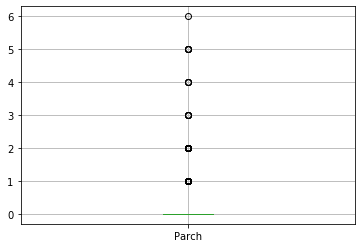

In [13]:
train_df.boxplot(column="Parch")

In [14]:
outer(train_df,"Parch")

     PassengerId  Survived  Pclass  \
7              8         0       3   
8              9         1       3   
10            11         1       3   
13            14         0       3   
16            17         0       3   
..           ...       ...     ...   
871          872         1       1   
879          880         1       1   
880          881         1       2   
885          886         0       3   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
16                                Rice, Master. Eugene    male   2.0      4   
..                                                 ...     ...   ... 

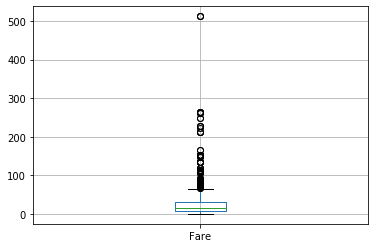

In [15]:
train_df.boxplot(column="Fare")

In [16]:
outer(train_df,"Fare")

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
13            14         0       3   
23            24         1       1   
..           ...       ...     ...   
856          857         1       1   
863          864         0       3   
867          868         0       1   
871          872         1       1   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

### 3.2 缺失值探查
名称、类型(数值型，类别型，文本等)、缺失值的百分比

> 其中我们可以分析得到特征Age, Cabin, Embarked具有缺失值，并且Cabin缺失率还特别高

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 3.2.1 缺失值估算
（由于这个步骤原来在特征工程部分，但是因为会影响到分析，因此首先处理）

In [19]:
Gend_male = pd.DataFrame(train_df[train_df["Sex"] == "male"])
mean_age_male = Gend_male['Age'].mean()

Gend_female = pd.DataFrame(train_df[train_df["Sex"] == "female"])
mean_age_female = Gend_female['Age'].mean()
train_df.loc[(train_df['Age'].isna()) & (train_df['Sex']=='male'), 'Age']=mean_age_male
train_df.loc[(train_df['Age'].isna()) & (train_df['Sex']=='female'), 'Age']=mean_age_female

Gend_male_test = pd.DataFrame(test_df[test_df["Sex"] == "male"])
mean_age_male_test = Gend_male_test['Age'].mean()

Gend_female_test = pd.DataFrame(test_df[test_df["Sex"] == "female"])
mean_age_female_test = Gend_female_test['Age'].mean()
test_df.loc[(test_df['Age'].isna()) & (test_df['Sex']=='male'), 'Age']=mean_age_male
test_df.loc[(test_df['Age'].isna()) & (test_df['Sex']=='female'), 'Age']=mean_age_female


In [20]:
train_df['Cabin'].fillna('NaN',inplace=True)
test_df['Cabin'].fillna('NaN',inplace=True)

In [21]:
fare_mean = test_df['Fare'].mean()
test_df['Fare'].fillna(fare_mean,inplace=True)

In [22]:
train_df['Embarked'].fillna('Unknown',inplace=True)

In [23]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### 3.3 特征与标签的关系（分布情况探查）

**生存者数量分布（Label）**

In [24]:
Survival_rate = {'Survived_count': [0],
                'Not_Survived_count' : [0],
                'Total' : [0]}

Survival_rate['Survived_count'] =  train_df.Survived.value_counts()[0]
Survival_rate['Not_Survived_count'] =  train_df.Survived.value_counts()[1]
Survival_rate['Total'] =  Survival_rate['Survived_count'] + Survival_rate['Not_Survived_count']

# Create the index 
index_ = ['Survival_Rate'] 
  
# Set the index 

Survival=pd.DataFrame([Survival_rate])
Survival.index = index_ 
Survival.transpose()

,Survival_Rate
Survived_count,549
Not_Survived_count,342
Total,891


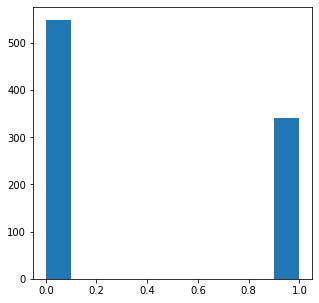

In [25]:
train_df['Survived'].hist(figsize=(5,5),grid=False)
# plt.plot()

## 单一分布情况
**幸存与否在社会阶层上的分布**

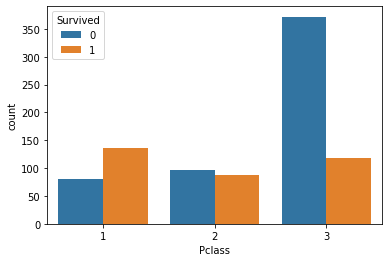

In [26]:
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)

**幸存与否在年龄上的分布**

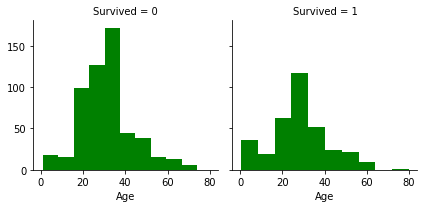

In [27]:
ax=sns.FacetGrid(train_df,col="Survived")
ax=ax.map(plt.hist,'Age',color="g",bins=10)

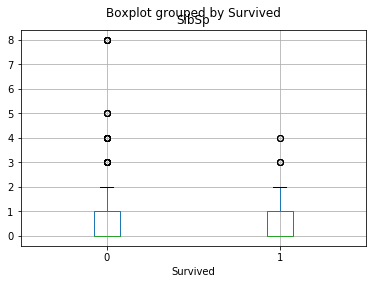

In [28]:
train_df.boxplot(column="SibSp",by="Survived")

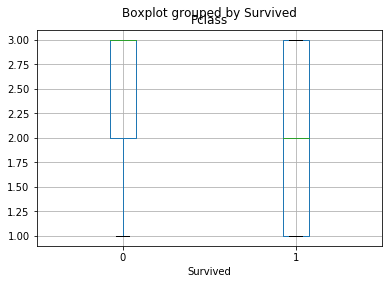

In [29]:
train_df.boxplot(column="Pclass", by="Survived")

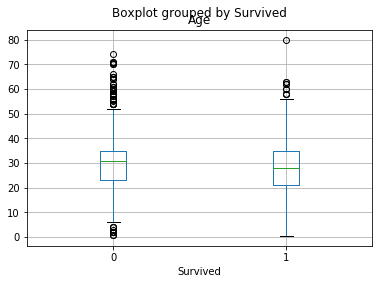

In [30]:
train_df.boxplot(column="Age",by="Survived")

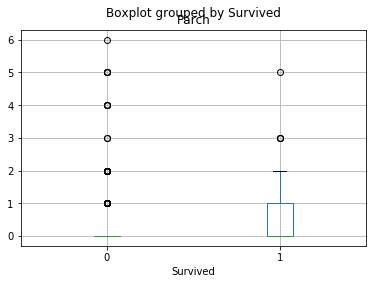

In [31]:
train_df.boxplot(column="Parch",by="Survived")

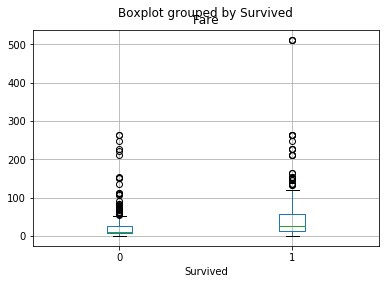

In [32]:
train_df.boxplot(column="Fare",by="Survived")

#### 复合分布（两个变量）
**是否生存与性别和登船港口的关系**

In [33]:
s_count = {'Not_Survived':[0],
          'Survived':[0]}
sf_count = {'Not_Survived':[0],
          'Survived':[0]}
c_count = {'Not_Survived':[0],
          'Survived':[0]}
cf_count = {'Not_Survived':[0],
          'Survived':[0]}
q_count = {'Not_Survived':[0],
          'Survived':[0]}
qf_count = {'Not_Survived':[0],
          'Survived':[0]}
s_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='S'),'Survived'].value_counts()[0]
s_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='S'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked S'] 
# Set the index 
male_S=pd.DataFrame([s_count])
male_S.index = index_ 
#male_S.transpose()
#male_S
sf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='S'),'Survived'].value_counts()[0]
sf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='S'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Female passengers : Embarked S'] 
# Set the index 
female_S=pd.DataFrame([sf_count])
female_S.index = index_
c_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='C'),'Survived'].value_counts()[0]
c_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='C'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked C'] 
# Set the index 
male_C=pd.DataFrame([c_count])
male_C.index = index_ 
#male_C
cf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='C'),'Survived'].value_counts()[0]
cf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='C'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Female passengers : Embarked C'] 
# Set the index 
female_C=pd.DataFrame([cf_count])
female_C.index = index_ 
q_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[0]
q_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked Q'] 
# Set the index 
male_Q=pd.DataFrame([q_count])
male_Q.index = index_ 
#male_Q
qf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[0]
qf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[1]
#Create the index 
index_ = ['female passengers : Embarked Q'] 
# Set the index 
female_Q=pd.DataFrame([qf_count])
female_Q.index = index_ 
#male_Q
frames=[male_S,female_S,male_C,female_C,male_Q,female_Q]
result=pd.concat(frames)
Gender_Embarked = pd.DataFrame(result)
Gender_Embarked


,Not_Survived,Survived
Male passengers : Embarked S,364,77
Female passengers : Embarked S,63,140
Male passengers : Embarked C,66,29
Female passengers : Embarked C,9,64
Male passengers : Embarked Q,38,3
female passengers : Embarked Q,9,27


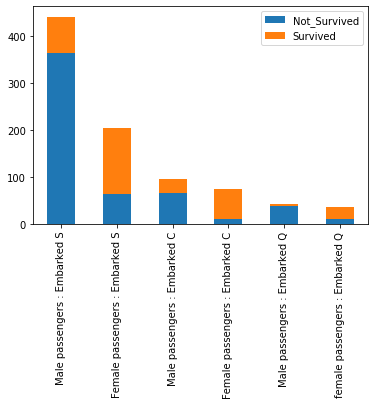

In [34]:
Gender_Embarked[["Not_Survived","Survived"]].plot(kind="bar",stacked=True)

**幸存者和未幸存者在性别和阶层的分布**

In [35]:
a = {'Not_Survived':[0],
          'Survived':[0]}
b = {'Not_Survived':[0],
          'Survived':[0]}
c = {'Not_Survived':[0],
          'Survived':[0]}
d = {'Not_Survived':[0],
          'Survived':[0]}
e = {'Not_Survived':[0],
          'Survived':[0]}
f = {'Not_Survived':[0],
          'Survived':[0]}
a=train_df.loc[(train_df['Sex']=='female') & (train_df['Pclass']== 1),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 1'] 
# Set the index 
female_1=pd.DataFrame([a])
female_1.index = index_ 
b=train_df.loc[(train_df['Sex']=='female') & (train_df['Pclass']== 2),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 2'] 
# Set the index 
female_2=pd.DataFrame([b])
female_2.index = index_ 
c=train_df.loc[(train_df['Sex']=='female') & (train_df['Pclass']== 3),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 3'] 
# Set the index 
female_3=pd.DataFrame([c])
female_3.index = index_ 
d=train_df.loc[(train_df['Sex']=='male') & (train_df['Pclass']== 1),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 1'] 
# Set the index 
male_1=pd.DataFrame([d])
male_1.index = index_ 
e=train_df.loc[(train_df['Sex']=='male') & (train_df['Pclass']== 2),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 2'] 
# Set the index 
male_2=pd.DataFrame([e])
male_2.index = index_ 
f=train_df.loc[(train_df['Sex']=='male') & (train_df['Pclass']== 3),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 3'] 
# Set the index 
male_3=pd.DataFrame([f])
male_3.index = index_ 
#male_Q
frames=[male_1,female_1,male_2,female_2,male_1,female_2,male_3,female_3]
result=pd.concat(frames)
Gender_PClass = pd.DataFrame(result)
Gender_PClass

,0,1
Male passengers : PClass 1,77,45
Female passengers : PClass 1,3,91
Male passengers : PClass 2,91,17
Female passengers : PClass 2,6,70
Male passengers : PClass 1,77,45
Female passengers : PClass 2,6,70
Male passengers : PClass 3,300,47
Female passengers : PClass 3,72,72


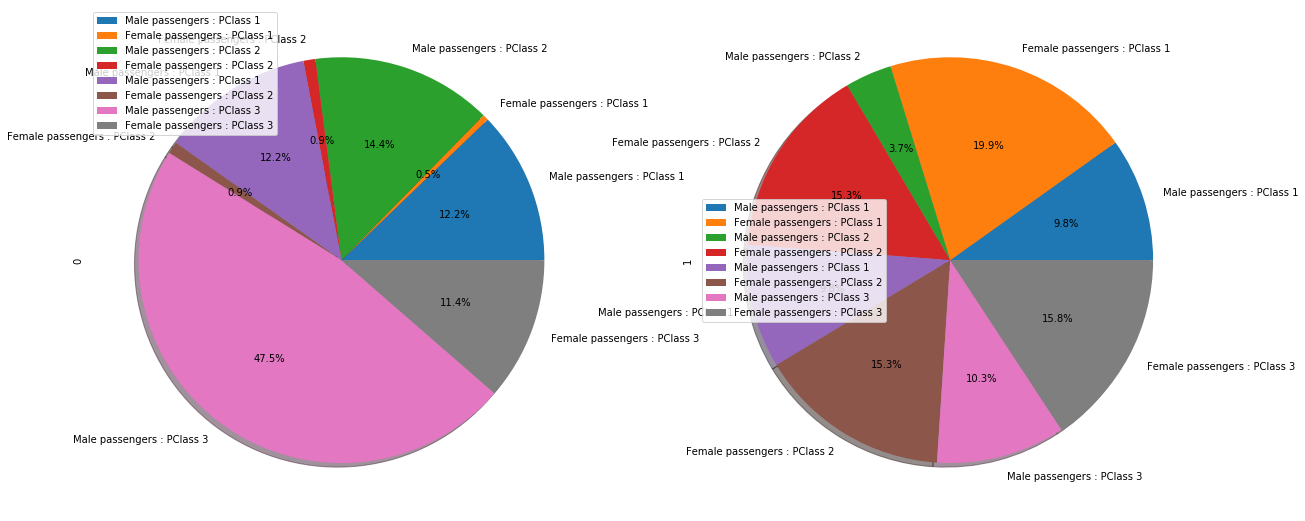

In [36]:
ax2 = Gender_PClass.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%',shadow=True)
plt.legend(loc='center left')
plt.show()

**Categorize by Age bins, PClass and Sex**

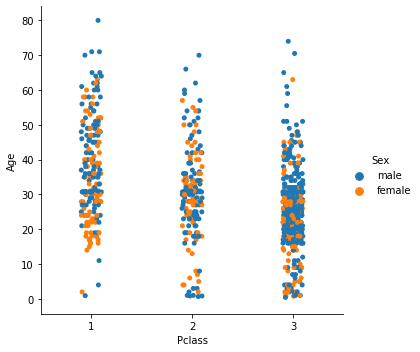

In [37]:
sns.catplot(x="Pclass",y="Age",hue="Sex",data=train_df)

## 4. 数据预处理
- 数据清洗（缺失值以及异常值的处理）
- 特征工程（基于对现有数据特征的理解构造的新特征，以挖掘数据的更多特点）
- 筛选子集（对数据进行降维，选择子集）

### 数据清洗
（缺失值上文已经处理，异常值暂时不处理）

### 特征工程

1. 测试特征。
2. 确定要创建的特征。
3. 创建特征。
4. 检查特征如何与您的模型一起使用。
5. 必要时改进特征。
6. 创建更多特征，直到完成工作。


特征工程技术包括补插值，处理异常值，合并，对数变换，编码，分箱，特征分割，缩放和提取日期等。

**对年龄进行分箱操作**

In [38]:
from sklearn.preprocessing import KBinsDiscretizer
model = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') # 设置8个箱, encode='ordinal'是指基于顺序
model.fit(train_df['Age'].values.reshape(-1,1)) # 在训练集上训练
train_df['age_bins'] = model.transform(train_df['Age'].values.reshape(-1,1)).reshape(-1) # 转换训练集
test_df['age_bins'] = model.transform(test_df['Age'].values.reshape(-1,1)).reshape(-1) # 转换测试集

In [39]:
print(model.bin_edges_[0])
train_df

[ 0.42   10.3675 20.315  30.2625 40.21   50.1575 60.105  70.0525 80.    ]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,2.0


**对Fare进行分箱操作****

In [40]:
model = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile') # 设置10个箱
model.fit(train_df['Fare'].values.reshape(-1,1)) # 在训练集上训练
train_df['Fare_cat'] = model.transform(train_df['Fare'].values.reshape(-1,1)).reshape(-1) # 转换训练集
test_df['Fare_cat'] = model.transform(test_df['Fare'].values.reshape(-1,1)).reshape(-1) # 转换测试集


In [41]:
print(model.bin_edges_[0])
train_df

[  0.       7.55     7.8542   8.05    10.5     14.4542  21.6792  27.
  39.6875  77.9583 512.3292]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3.0,8.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3.0,8.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,2.0,4.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0,7.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S,2.0,6.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,2.0,7.0


**简单文本特征处理，姓名特征中提取称呼**

In [42]:
name = train_df['Name']
#Extract the initials
train_df['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
test_df['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
train_df['Title'].astype(str)
test_df['Title'].astype(str)

#Assign Rare for the rare initials
rare_title = ["Rev", "Major", "Lady", "Dr", "Mme", "Mlle", "Col", "Capt"]
train_df['Title'] = train_df['Title'].replace(rare_title,'Rare')
test_df['Title'] = test_df['Title'].replace(rare_title,'Rare')

# Categorize the Initial
train_df['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
test_df['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
#train_df

# Missing values Imputation
train_df['Title'].fillna(0,inplace=True)
test_df['Title'].fillna(0,inplace=True)

In [43]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,Fare_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3.0,8.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,2.0,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3.0,8.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,2.0,4.0,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0,7.0,3.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S,2.0,6.0,3.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,2.0,7.0,1.0


**将性别的类别型特征转换为数值型特征**

In [44]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

**将港口类别型特征也转换为数值型特征**

In [45]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3,'Unknown':0} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3,'Unknown':0} ).astype(int)

In [46]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,Fare_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,1,2.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2,3.0,8.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,2.0,2.0,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1,3.0,8.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1,2.0,4.0,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,1,1.0,7.0,3.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27.915709,1,2,W./C. 6607,23.4500,NaN,1,2.0,6.0,3.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,2,2.0,7.0,1.0


**对家族成员数量做个统计，并添加类别特征（二值化）**

In [47]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone']=0
train_df.loc[(train_df['Family_Size']==1),'IsAlone']=1
train_df.loc[(train_df['Family_Size']==0) | (train_df['Family_Size']>1),'IsAlone']=0

test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']
test_df['IsAlone']=0
test_df.loc[(test_df['Family_Size']==1),'IsAlone']=1
test_df.loc[(test_df['Family_Size']==0) | (test_df['Family_Size']>1),'IsAlone']=0

In [48]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,1,2.0,0.0,1.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2,3.0,8.0,2.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,2.0,2.0,3.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1,3.0,8.0,2.0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1,3.0,3.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1,2.0,4.0,5.0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,1,1.0,7.0,3.0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27.915709,1,2,W./C. 6607,23.4500,NaN,1,2.0,6.0,3.0,3,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,2,2.0,7.0,1.0,0,0


### 特征选择
特征选择是机器学习的核心概念之一，它极大地影响了模型的性能。不相关或部分相关的特征可能会对模型的性能产生负面影响。特征选择和数据清理应该是模型设计的第一步，也是最重要的一步。

**功能选择的好处：**

1. 减少过度拟合
2. 提高准确性
3. 减少训练时间

**特征选择的方法**

1. 过滤法
2. 包裹法
3. 嵌入法

过滤方法分为两种类型。统计方法和功能重要性。统计方法有皮尔逊系数、斯皮尔曼系数、ANOVA、卡方检验和互信息检验。绘制相关系数热力图是识别要素重要性的基本方法。

包裹法使用诸如前向特征选择、向后消除、递归特征消除等技术。

嵌入式方法是包装方法和过滤方法的组合。嵌入式方法中的技术是山脊回归和套索回归或者是树形分类器。

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  age_bins     891 non-null    float64
 13  Fare_cat     891 non-null    float64
 14  Title        891 non-null    float64
 15  Family_Size  891 non-null    int64  
 16  IsAlone      891 non-null    int64  
dtypes: float64(5), int64(9), object(3)
memory usage: 118.5+ KB


In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    int64  
 11  age_bins     418 non-null    float64
 12  Fare_cat     418 non-null    float64
 13  Title        418 non-null    float64
 14  Family_Size  418 non-null    int64  
 15  IsAlone      418 non-null    int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 52.4+ KB


**皮尔森相关系数热力图**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

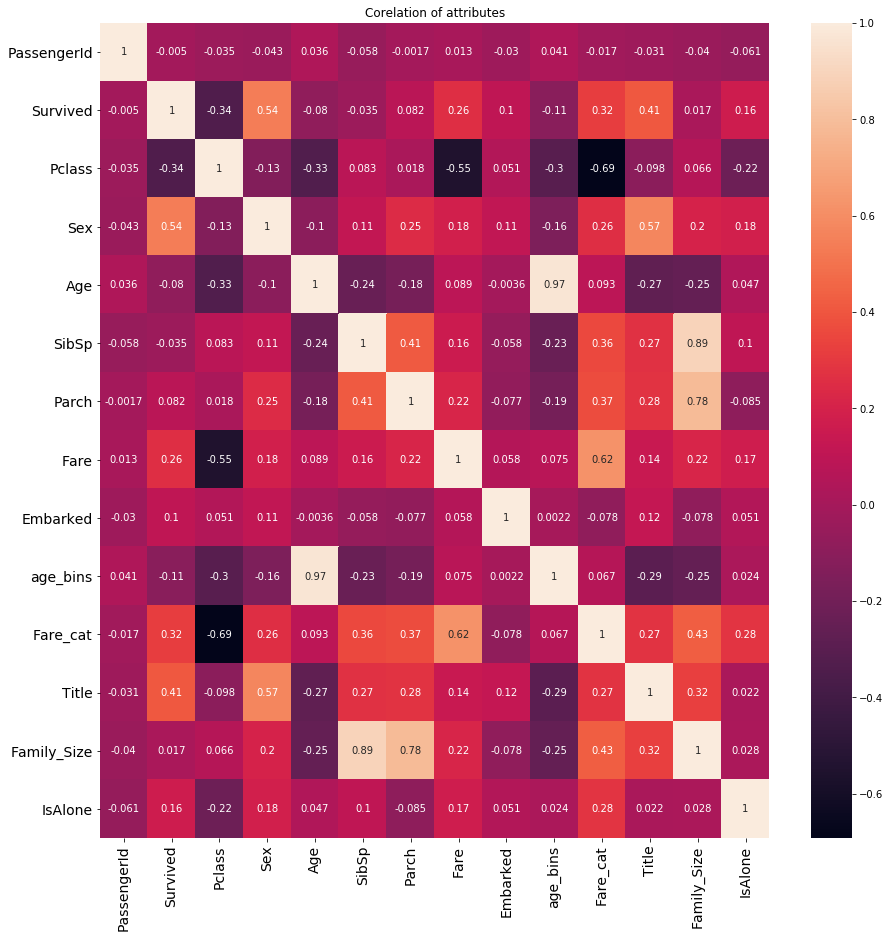

In [51]:
sns.heatmap(train_df.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**具有正相关的特征是**
- age : age_bins (0.97)
- Fare: Fare_cat (0.62)
- SibSp : Family_size (0.89)
- Parch : Family_size (0.78)
- Sex:Title (0.57)
- Survived : Sex(0.54)

**具有负相关的特征是**

- Pclass : Fare(-0.55)
- Pclass : Fare_cat(-0.69)

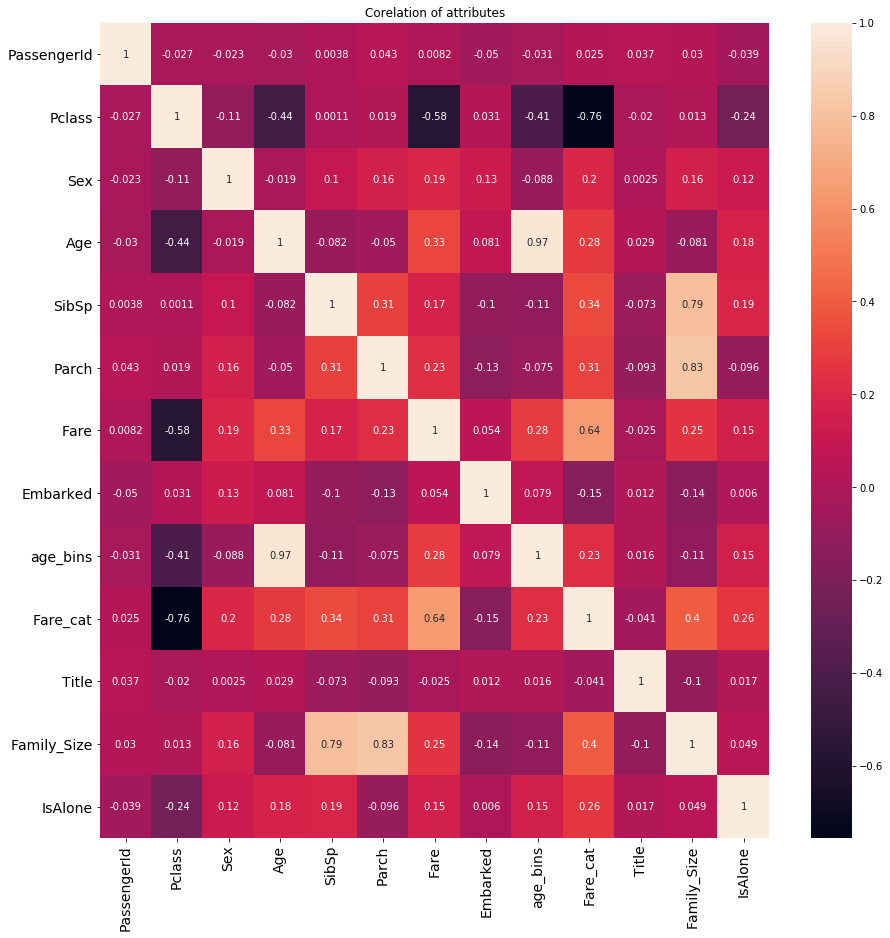

In [52]:
# 查看测试集的情况
sns.heatmap(test_df.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 使用嵌入法 ExtraTreeClassifier 获取特征重要性

In [53]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
y = train_df['Survived'] 

# 首先先删除掉无关的类别型特征，以及label
X = train_df.drop(['Survived','Name','Ticket','Cabin'],axis=1) 

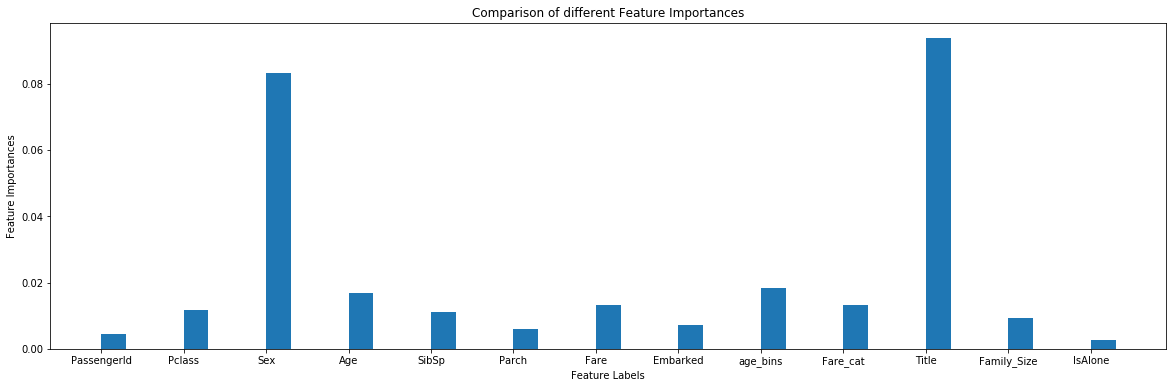

In [54]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 5) 

# Training the model 
extra_tree_forest.fit(X, y) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(20,6))
plt.bar(X.columns,feature_importance_normalized,align='edge', width=0.3) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 

plt.show() 


### 使用过滤法 卡方检验对特征进行选择

In [55]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
X.shape
# Two features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 9) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])
X_kbest_features
#PClass, Age, Sex, Fare, Fare_cat, Title, Family Size - Top 7 features

Original feature number: 13
Reduced feature number: 9


array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        , 38.        , ...,  8.        ,
         2.        ,  1.        ],
       [ 3.        ,  1.        , 26.        , ...,  2.        ,
         3.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 27.91570881, ...,  6.        ,
         3.        ,  0.        ],
       [ 1.        ,  0.        , 26.        , ...,  7.        ,
         1.        ,  0.        ],
       [ 3.        ,  0.        , 32.        , ...,  1.        ,
         1.        ,  0.        ]])

In [56]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,1,3,0,22.0,1,0,7.2500,1,2.0,0.0,1.0,1,1
1,2,1,1,38.0,1,0,71.2833,2,3.0,8.0,2.0,1,1
2,3,3,1,26.0,0,0,7.9250,1,2.0,2.0,3.0,0,0
3,4,1,1,35.0,1,0,53.1000,1,3.0,8.0,2.0,1,1
4,5,3,0,35.0,0,0,8.0500,1,3.0,3.0,1.0,0,0


## 5. 构建不同的模型加以训练
- 选择各种不同的但是适合该类型问题的模型对训练集进行训练
- 使用标准参数，从不同的类别(例如线性、朴素贝叶斯、SVM、随机森林、神经网络等)快速训练基本的模型。
- 度量，比较不同模型之间的性能

挑选足够多的分类模型
- 线性模型：逻辑回归、SVM、
- 基于距离的模型：KNN
- 基于概率的模型：朴素贝叶斯
- 树模型：决策树
- 集成模型：随机森林

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

基于特征选择后的结果，我们保留数据集中最重要的要素以进行预测并删除不必要的要素。

**在预测之前，将训练集和测试集中不必要的列删除**

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  age_bins     891 non-null    float64
 13  Fare_cat     891 non-null    float64
 14  Title        891 non-null    float64
 15  Family_Size  891 non-null    int64  
 16  IsAlone      891 non-null    int64  
dtypes: float64(5), int64(9), object(3)
memory usage: 118.5+ KB


In [59]:
train_df = train_df.drop("Name", axis=1)
train_df = train_df.drop("Ticket", axis=1)
train_df = train_df.drop("Cabin", axis=1)
train_df = train_df.drop("Fare", axis=1)
# train_df = train_df.drop("Fare_cat", axis=1)
#train_df = train_df.drop("Embarked", axis=1)
train_df = train_df.drop("IsAlone", axis=1)
#train_df = train_df.drop("SibSp", axis=1)
#train_df = train_df.drop("Parch", axis=1)
#train_df = train_df.drop("Pclass", axis=1)
#train_df = train_df.drop("Age", axis=1)
train_df = train_df.drop("age_bins", axis=1)
train_df = train_df.drop("PassengerId", axis=1)


test_df = test_df.drop("Name", axis=1)
test_df = test_df.drop("Ticket", axis=1)
test_df = test_df.drop("Cabin", axis=1)
test_df = test_df.drop("Fare", axis=1)
# test_df = test_df.drop("Fare_cat", axis=1)
#test_df = test_df.drop("Embarked", axis=1)
test_df = test_df.drop("IsAlone", axis=1)
#test_df = test_df.drop("SibSp", axis=1)
#test_df = test_df.drop("Parch", axis=1)
#test_df = test_df.drop("Pclass", axis=1)
#test_df = test_df.drop("Age", axis=1)
test_df = test_df.drop("age_bins", axis=1)


**Corelation map (Heatmap) after Feature Selection and dropping columns for prediction**

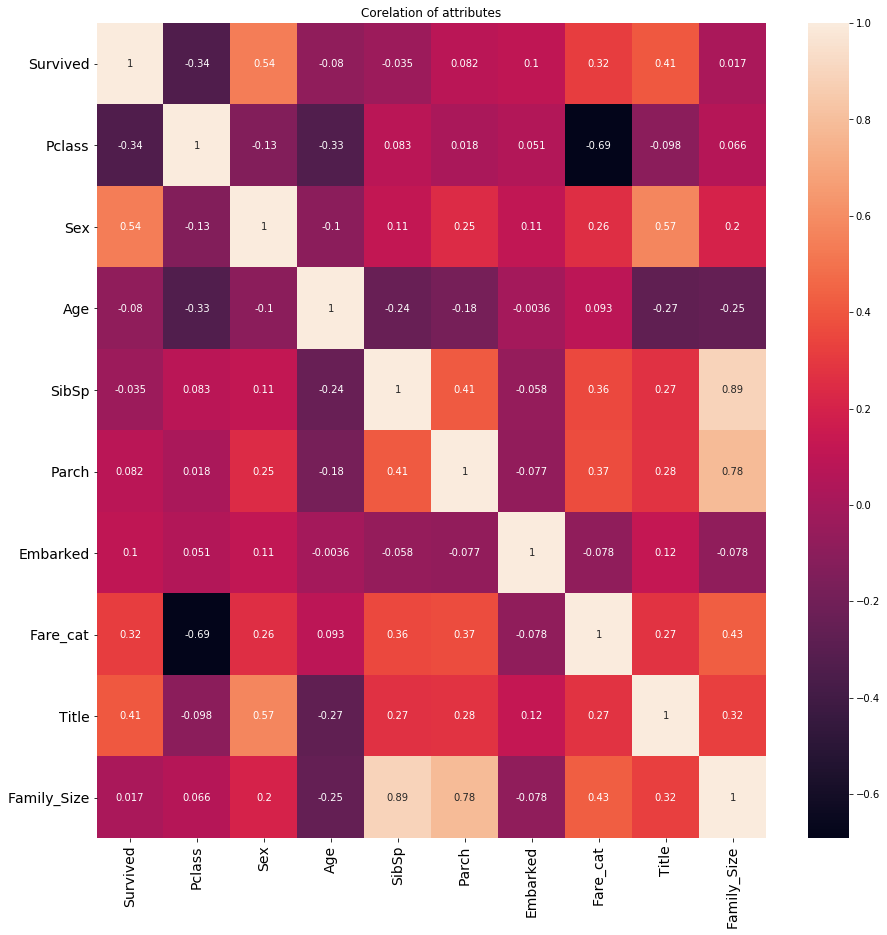

In [60]:
sns.heatmap(train_df.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

训练样本和训练标签，重构测试集

In [61]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [62]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_cat,Title,Family_Size
0,3,0,34.5,0,0,3,1.0,1.0,0
1,3,1,47.0,1,0,1,0.0,2.0,1
2,2,0,62.0,0,0,3,3.0,3.0,0
3,3,0,27.0,0,0,1,3.0,2.0,0
4,3,1,22.0,1,1,1,4.0,1.0,2


**Logistic Regression**

In [63]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
logistic_score = round(model.score(X_train,y_train) * 100,2)
print(logistic_score)

79.91


**SVM Classification**

RBF SVM

In [64]:
from sklearn import svm
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

88.78

**Linear SVC**

In [65]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_l_svc = round(model.score(X_train, y_train) * 100, 2)
acc_l_svc

79.01

**KNN Classification**

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


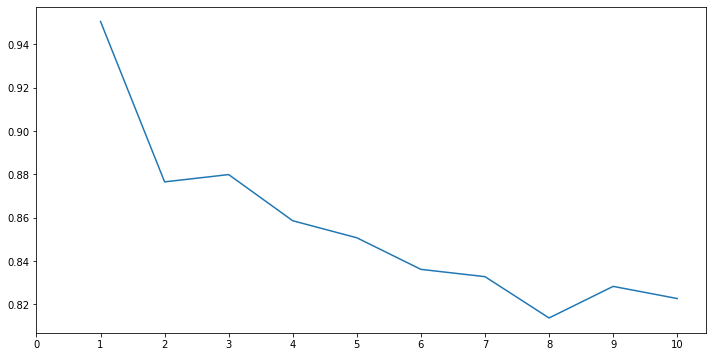

Accuracies for different values of n are: [0.95061728 0.87654321 0.87991021 0.85858586 0.85072952 0.83613917
 0.83277217 0.81369248 0.82828283 0.82267116] with the max value as  0.9506172839506173


82.27

In [66]:
#KNN Classification
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    a=a.append(pd.Series(model.score(X_train,y_train)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())
acc_knn = round(model.score(X_train,y_train)*100,2)
acc_knn

**Gaussian Naive Bayes Classification**

In [67]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc_gaus = round(model.score(X_train,y_train)*100,2)
acc_gaus

78.68

**Decision Tree Classification**

In [68]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_dec = round(model.score(X_train, y_train) * 100, 2)
acc_dec

96.41

**在进行决策树时也可以使用递归特征消除方法**

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
rfe.score(X_train, y_train)
rfe_scc = round(rfe.score(X_train, y_train) * 100, 2)

for i in range(X_train.shape[1]):
    print('Column: %d, Name: %s, Selected %s, Rank: %.3f' % (i, X_train.columns[i],rfe.support_[i], rfe.ranking_[i]))

Column: 0, Name: Pclass, Selected True, Rank: 1.000
Column: 1, Name: Sex, Selected False, Rank: 3.000
Column: 2, Name: Age, Selected True, Rank: 1.000
Column: 3, Name: SibSp, Selected False, Rank: 4.000
Column: 4, Name: Parch, Selected False, Rank: 5.000
Column: 5, Name: Embarked, Selected False, Rank: 2.000
Column: 6, Name: Fare_cat, Selected True, Rank: 1.000
Column: 7, Name: Title, Selected True, Rank: 1.000
Column: 8, Name: Family_Size, Selected True, Rank: 1.000


 这里列出6个输入特征，它们是否被选中，以及它们的相对重要性排序。

**Random Forest Classification**

In [70]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred_ran = model.predict(X_test)
model.score(X_train, y_train)
acc_forest = round(model.score(X_train, y_train) * 100, 2)
acc_forest

96.41

### **Cross Validation**
k-折检验：将训练集分成K份，一份作为验证集，其他作为模型的训练输入。训练执行K次，以平均accuracy作为最终accuracy
<img src="Image/k-fold.png" width="100%">

In [71]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm',
             'Radial Svm',
             'Logistic Regression',
             'KNN',
             'Decision Tree',
             'Naive Bayes',
             'Random Forest']
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,CV Mean,Std
Linear Svm,0.786729,0.039372
Radial Svm,0.729625,0.050311
Logistic Regression,0.796879,0.026613
KNN,0.774519,0.048361
Decision Tree,0.775568,0.040281
Naive Bayes,0.784544,0.033761
Random Forest,0.796854,0.023829


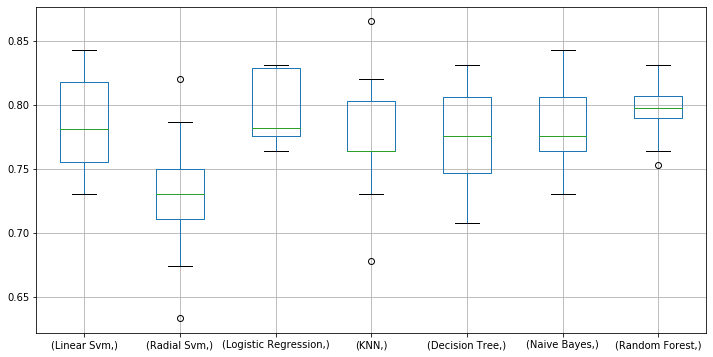

In [72]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

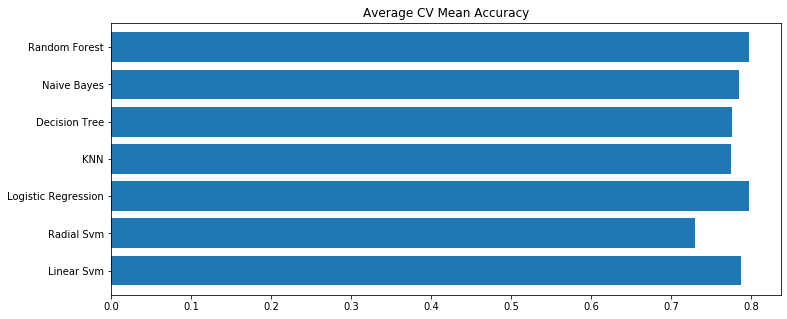

In [73]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(12,5)
plt.show()

> 注：什么时候用分箱后的离散特征，什么时候用没有分箱的连续特征？

大家可以尝试一下，删除`Fare_cat`而不是`Fare`，观察训练准确率和交叉验证准确率的变化情况。

判断两种特征对于线性模型和对于树模型的差别。


**Confusion Matrix**

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

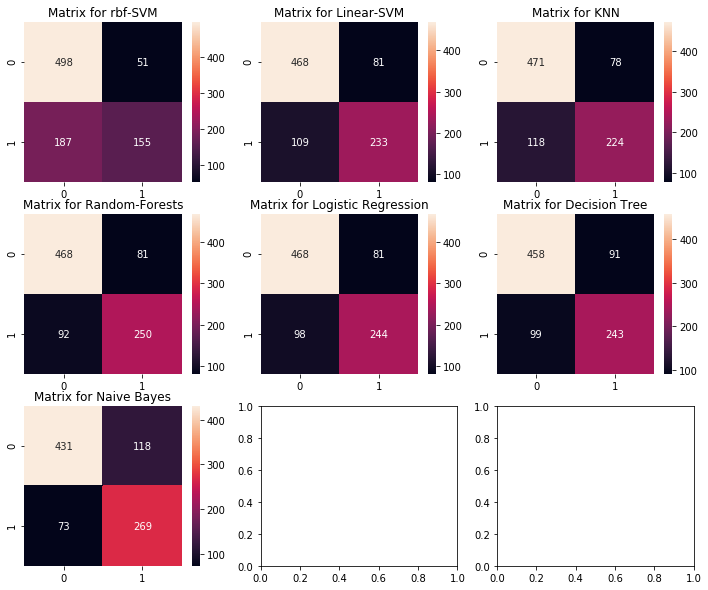

In [74]:
from sklearn.metrics import confusion_matrix
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### 6. 进行模型验证并微调模型(超参数)
- 筛选表现较好的模型，进行进一步优化，微调模型的超参数观察模型得分变化
- 使用交叉验证微调超参数

In [75]:
# 以决策树为例，我们使用交叉验证来微调max_depth这个参数
# tree = DecisionTreeClassifier()

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
mean_=[]
accuracy=[]
std=[]
max_depth = range(1,20)
for i in max_depth:
    model = DecisionTreeClassifier(max_depth=i)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    mean_.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':mean_,'Std':std},index=max_depth)       
new_models_dataframe2


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,CV Mean,Std
1,0.777778,0.037528
2,0.785693,0.038979
3,0.817041,0.038360
4,0.819288,0.046503
5,0.814782,0.036805
6,0.808127,0.047555
7,0.814856,0.043660
8,0.810375,0.040673
9,0.798052,0.036385
10,0.790175,0.027513


如果我们要调整多个模型，每个模型都有多个参数，每个参数都有多个候选值，该怎么办？

#### 超参调优 Hyperparameters tuning

超参数是在学习过程开始之前设置其值的参数。 

超参数调优是为机器学习算法从众多的候选参数中选择一组最优参数。特别的，超参数优化是深度学习中的具有广泛作用。其原因在于，神经网络是公认的难以配置，而又有很多参数需要设置。最重要的是，个别模型的训练非常缓慢。

在sklearn中有四种搜索方式：
<img src="Image/hpo.png" width="100%">

本次介绍优化超参数的两种不同方法：**网格搜索**和**随机搜索**

网格搜索（Grid Search）名字非常大气，但是用简答的话来说就是你手动的给出一个模型中你想要改动的所用的参数，程序自动的帮你使用穷举法来将所用的参数都运行一遍。决策树中我们常常将最大树深作为需要调节的参数；AdaBoost中将弱分类器的数量作为需要调节的参数。

主要步骤如下：

- 定义一个 n 维的网格，其中每格都有一个超参数映射。例如 n = (learning_rate, dropout_rate, batch_size)
- 对于每个维度，定义可能的取值范围：例如 batch_size = [4,8,16,32,64,128,256 ]
- 搜索所有可能的配置并等待结果去建立最佳配置：例如 C1 = (0.1, 0.3, 4) -> acc = 92%, C2 = (0.1, 0.35, 4) -> acc = 92.3% 等...

<img src="Image/gs.jpeg" width="80%">

然而，网格搜索其实是十分低效的。在网格搜索中，很容易注意到，即使我们已经训练了 9 个模型，但我们每个变量只使用了 3 个值！然而，使用随机布局，我们不太可能多次选择相同的变量。结果是，通过第二种方法，我们将为每个变量使用 9 个不同的值训练 9 个模型。

<img src="Image/rs.jpeg" width="80%">

> 总结：如果搜索空间包含 3 到 4 个以上的维度，请不要使用网格搜索。

Kernel SVM 网格搜索
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [224]:
from sklearn.model_selection import GridSearchCV
C=[2,2.1,2.5]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 15.3min finished


0.7889837423890528
SVC(C=2, gamma=0.1, kernel='linear')


Random Forest Classification 网格搜索

In [ ]:
n_estimators=range(100,1000,1100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Kernel SVM 随机搜索
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
C=[2,2.1,2.5]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
randomsearch=RandomizedSearchCV(estimator=svm.SVC(),param_distributions=hyper,n_iter = 10, verbose=True)
randomsearch.fit(X_train,y_train)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)

### 7. 产生结果提交，总结
- 将训练好的模型应用于测试集，并将产生的结果提交到kaggle页面
- 记录已经完成的工作
- 试图解释为什么该方案实现了目标
- 通过漂亮的可视化或容易记住的陈述来传达你的关键发现

In [232]:
model = DecisionTreeClassifier() # your model here
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
submission = pd.read_csv('dataset/titanic/gender_submission.csv')
submission["Survived"] = y_pred
submission.to_csv("submit.csv", index=False)

# 总结
## Kaggle实战解题的基本步骤
1. 总览问题和目标，是什么数学问题，希望得到什么结果
2. 获取数据
3. 探索数据：进一步获取更深层次的信息（可以使用可视化）
4. 数据预处理、特征工程等
6. 构建不同的模型加以训练
7. 进行模型验证并微调模型(超参数)
8. 产生结果提交

### 1. 总览问题和目标，是什么数学问题，希望得到什么结果

- 用机器学习的术语定义目标
- 判断是什么类型的问题，监督非监督，在线离线等等
- 怎么进行性能评估
- 有类似的问题吗？是否可以重用解决方案和工具

### 2. 获取数据
- 列出所需要的数据
- 检查需要占用的空间
- 获取数据
- 检查数据的大小和类型，比如时间序列，样本，和地理位置

### 3. 探索数据：进一步获取更深层次的信息
- 创建数据集的一个副本。如有必要，取样到适合大小。
- 创建jupyter文件，保存数据探索的过程。
- 研究每个属性及其特征
    - 名称
    - 类型(数值型，类别型，文本等)
    - 缺失值的百分比
    - 噪声和噪声类型(随机、异常值、舍弃误差等)
    - 分布类型，高斯？正态？均匀？对数？
- 如果是监督问题，确定标记出目标值。
- 可视化数据
- 研究不同属性间的相关性(corr)
- 研究通常怎么解决该问题
- 确定您可能想要应用的有希望的转换。
- 记录所得到的结果

### 4. 数据预处理
- 数据清洗（缺失值以及异常值的处理）
- 特征工程（基于对现有数据特征的理解构造的新特征，以挖掘数据的更多特点）
- 筛选子集（对数据进行降维，选择子集）

### 5. 构建不同的模型加以训练
- 选择各种不同的但是适合该类型问题的模型对训练集进行训练
- 使用标准参数，从不同的类别(例如线性、朴素贝叶斯、SVM、随机森林、神经网络等)快速训练基本的模型。
- 度量，比较不同模型之间的性能

### 6. 进行模型验证并微调模型(超参数)
- 筛选表现较好的模型，进行进一步优化，微调模型的超参数观察模型得分变化
- 使用交叉验证微调超参数

### 7. 产生结果提交，总结
- 将训练好的模型应用于测试集，并将产生的结果提交到kaggle页面
- 记录已经完成的工作
- 试图解释为什么该方案实现了目标
- 通过漂亮的可视化或容易记住的陈述来传达你的关键发现

## 福利
### score 1.000 submission

In [262]:
import re
ground_truth = pd.read_csv("titanic_ground_truth.txt")
test_df = pd.read_csv("dataset/titanic/test.csv")
for i, name in enumerate(ground_truth['name']):
    if '"' in name:
        ground_truth['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test_df['Name']):
    if '"' in name:
        test_df['Name'][i] = re.sub('"', '', name)
        
survived = []

for name in test_df['Name']:
    survived.append(int(ground_truth.loc[ground_truth['name'] == name]['survived'].values[-1]))
    
submission = pd.read_csv('dataset/titanic/gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('sub_cheat.csv', index=False)